📊 Class Imbalance in One-Hot Encoded Categorical Features:
                     airline  iso_country_dep  iso_country_arr
airline_5K          0.306900              NaN              NaN
airline_5M          0.274876              NaN              NaN
airline_6P          0.002669              NaN              NaN
airline_BJ          0.162790              NaN              NaN
airline_D4          0.364277              NaN              NaN
...                      ...              ...              ...
iso_country_dep_SN       NaN         0.769918              NaN
iso_country_dep_TG       NaN         0.000000              NaN
iso_country_dep_TN       NaN        51.745994              NaN
iso_country_dep_TR       NaN         1.523825              NaN
iso_country_dep_UA       NaN         0.004003              NaN

[117 rows x 3 columns]


/var/folders/ch/m_r4gx2901zdngn7fs_1cpm80000gn/T/ipykernel_2556/2278971666.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index[:10], y=distribution.values[:10], palette="Blues_r")
/var/folders/ch/m_r4gx2901zdngn7fs_1cpm80000gn/T/ipykernel_2556/2278971666.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index[:10], y=distribution.values[:10], palette="Blues_r")
/var/folders/ch/m_r4gx2901zdngn7fs_1cpm80000gn/T/ipykernel_2556/2278971666.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.

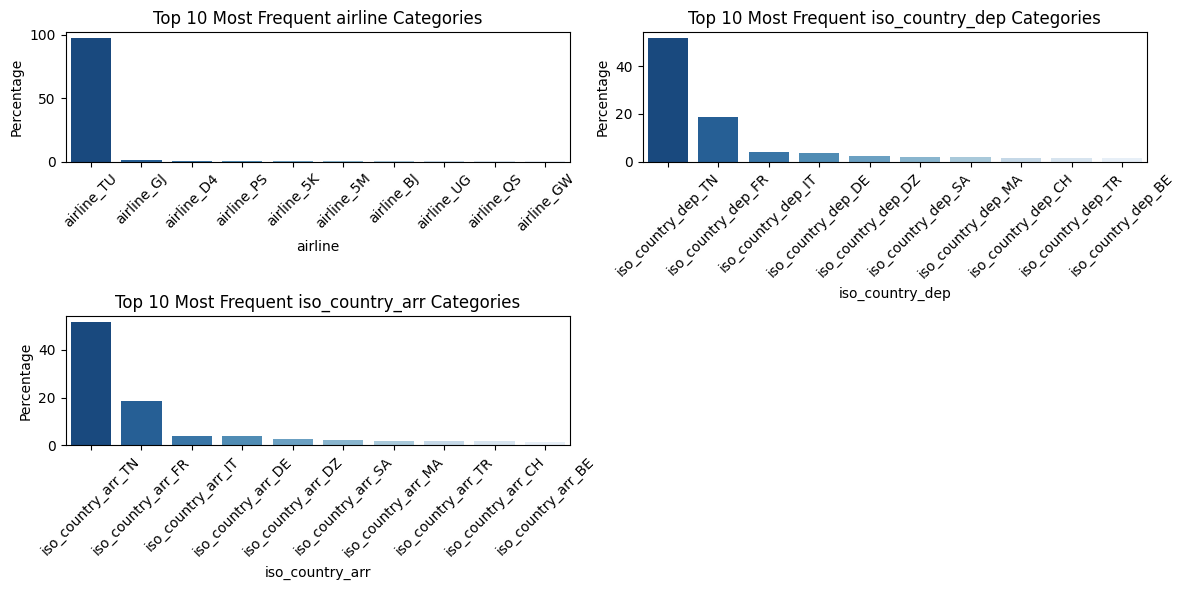

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
X_train = pd.read_csv("../data/X_train.csv")
y_train = pd.read_csv("../data/y_train.csv")

# Merge X_train and y_train for easier analysis
df_train = X_train.copy()
df_train["target"] = y_train.squeeze()  # Ensure y_train is a series, not a DataFrame

# 📌 Detect all feature prefixes (e.g., 'airline_', 'iso_country_dep_')
airline_columns = [col for col in df_train.columns if col.startswith("airline_")]
country_dep_columns = [col for col in df_train.columns if col.startswith("iso_country_dep_")]
country_arr_columns = [col for col in df_train.columns if col.startswith("iso_country_arr_")]

# 📌 Compute aggregated distributions for each categorical group
feature_groups = {
    "airline": airline_columns,
    "iso_country_dep": country_dep_columns,
    "iso_country_arr": country_arr_columns,
}

class_distributions = {}
for group, columns in feature_groups.items():
    class_distributions[group] = df_train[columns].sum().sort_values(ascending=False) / len(df_train) * 100

# 📌 Convert to DataFrame for better visualization
class_distribution_df = pd.DataFrame(class_distributions)

# Display class imbalance
print("📊 Class Imbalance in One-Hot Encoded Categorical Features:")
print(class_distribution_df)

# 📌 Plot class distribution
plt.figure(figsize=(12, 6))
for i, (group, distribution) in enumerate(class_distributions.items(), 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=distribution.index[:10], y=distribution.values[:10], palette="Blues_r")
    plt.xlabel(group)
    plt.ylabel("Percentage")
    plt.title(f"Top 10 Most Frequent {group} Categories")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [3]:
print(df_train.columns)


Index(['is_same_country', 'airline_5K', 'airline_5M', 'airline_6P',
       'airline_BJ', 'airline_D4', 'airline_GJ', 'airline_GW', 'airline_OL',
       'airline_PS',
       ...
       'iso_country_arr_SK', 'iso_country_arr_SN', 'iso_country_arr_TG',
       'iso_country_arr_TN', 'iso_country_arr_TR', 'iso_country_arr_UA',
       'type_arr_large_airport', 'type_arr_medium_airport',
       'type_arr_small_airport', 'target'],
      dtype='object', length=148)
